<a href="https://colab.research.google.com/github/chaerui7967/stock_predict_news_and_youtube/blob/master/%EA%B8%B0%EC%82%AC_%EA%B0%90%EC%84%B1%EC%82%AC%EC%A0%84_%EB%AA%A8%EB%8D%B8%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install konlpy

In [2]:
import pandas as pd 

df = pd.read_csv('./labeling.csv')
df = df.dropna()

train = df[:-1500]
test = df[-1500:]

len(train), len(test)

(8008, 1500)

In [3]:
train.head()

,text,label
0,2020년에는 상대평가제도도 폐지소통강화 위해 호칭도 TL로 통일 아시아경제 안하늘...,1
1,아시아경제 오주연 기자 오션브릿지오션브릿지241790코스닥증권정보현재가15150전일...,1
2,인사제도 파격적 개편최태원 회장의 딥체인지 실현 아시아경제 안하늘 기자 SK하이닉스...,0
3,아시아경제 송화정 기자신한금융투자는 26일 SK하이닉스SK하이닉스000660코스피증...,1
4,아시아경제 오주연 기자 하나금융투자가 27일 SK하이닉스SK하이닉스000660코스피...,0


   label  count
0     -1   2133
1      0    967
2      1   4908


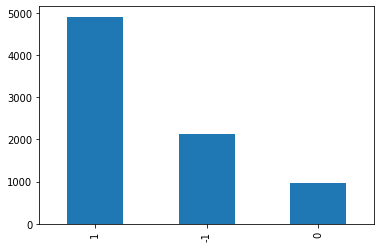

In [4]:
%matplotlib inline 
import matplotlib.pyplot as plt

train['label'].value_counts().plot(kind='bar')
print(train.groupby('label').size().reset_index(name='count'))

   label  count
0     -1    293
1      0    131
2      1   1076


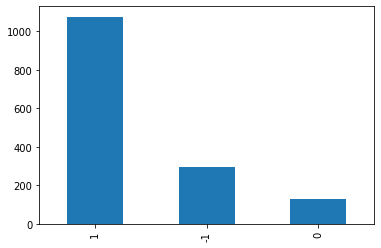

In [5]:
test['label'].value_counts().plot(kind='bar')
print(test.groupby('label').size().reset_index(name='count'))

In [6]:
# 불용어 로드
url = 'https://raw.githubusercontent.com/chaerui7967/stock_predict_news_and_youtube/master/Sentiment_Analysis/data/stopwords_ver1.txt'
stopwords = list(pd.read_csv(url, header=None)[0])

In [7]:
import konlpy
from konlpy.tag import Okt
okt = Okt()
X_train = [] 
for sentence in train['text']: 
    temp_X = [] 
    temp_X = okt.morphs(sentence, stem=True) # 토큰화 
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    temp_X = [word for word in temp_X if len(word) > 1] # 불용어 제거 
    X_train.append(temp_X) 

X_test = [] 
for sentence in test['text']:
    temp_X = [] 
    temp_X = okt.morphs(sentence, stem=True) # 토큰화 
    temp_X = [word for word in temp_X if not word in stopwords]
    temp_X = [word for word in temp_X if len(word) > 1] # 불용어 제거 
    X_test.append(temp_X)

In [8]:
print('train', X_train[:3])
print('test', X_test[:3])

train [['2020년', '에는', '상대평가', '제도', '폐지', '소통', '강화', '위해', '호칭', 'TL', '통일', '아시아', '경제', '하늘', '기자', 'SK', '하이닉스', '기술', '높다', '엔지니어', '경우', '정년', '60', '관계', '없이', '새롭다', '제도', '도입', '전문성', '갖추다', '우수하다', '엔지니어', '정년', '이후', '에도', '활발하다', '연구개발', '제조', '분석', '업무', '매진', '되다', 'SK', '하이닉스', '27일', '캠퍼스', '이석희', '사장', 'CEO', '직원', '400', '여명', '참석', '가운데', '왁자지껄', '콘서트', '열다', '엔지니어', '정년', '이후', '근무', '가능하다', '제도', '도입', '협업', '강화', '평가', '제도', '개선', '골자', 'CEO', '공감', '경영', '선언', '발표', '선언', '해외', '혁신', '기업', '문화', '체험', '위해', '모집', '되다', '직원', '지난', '9월', '현장', '방문', '내놓다', '목소리', '바탕', '구성', '돼다', '먼저', 'SK', '하이닉스', '우수', '엔지니어', '정년', '지나다', '전문성', '따르다', '계속', '근무', '제도', '도입', 'SK', '하이닉스', '제도', '도입', '오랫동안', '회사', '성장', '기여', '우수하다', '기술', '인력', '정년', '넘어서다', '회사', '실력', '발휘', '되어다', '개개인', '회사', '기술', '역량', '한층', '높이다', '기대하다', '만석', 'SK', '하이닉스', 'HR', '담당', '전무', '반도체', '개발', '제조', '분야', '숙련', '되다', '인력', '대한', '수요', '지속', '새롭다', '도입', '보다', '제도', '내년', '정년', '대상자', '시행'

In [9]:
from keras.preprocessing.text import Tokenizer 
max_words = 35000
tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

최대 길이 :  294
평균 길이 :  219.1851898101898


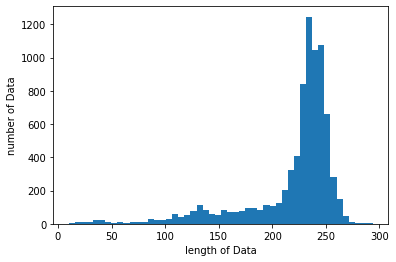

최대 길이 :  263
평균 길이 :  215.19933333333333


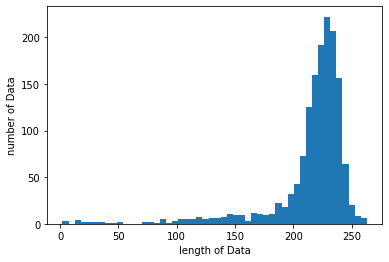

In [10]:
print("최대 길이 : ", max(len(l) for l in X_train))
print("평균 길이 : ", sum(map(len, X_train))/ len(X_train))
plt.hist([len(s) for s in X_train], bins=50) 
plt.xlabel('length of Data') 
plt.ylabel('number of Data') 
plt.show()


print("최대 길이 : ", max(len(l) for l in X_test)) 
print("평균 길이 : ", sum(map(len, X_test))/ len(X_test)) 
plt.hist([len(s) for s in X_test], bins=50) 
plt.xlabel('length of Data') 
plt.ylabel('number of Data') 
plt.show()

In [11]:
import numpy as np 
y_train = [] 
y_test = [] 

for i in range(len(train['label'])): 
    if train['label'].iloc[i] == 1: 
        y_train.append([0, 0, 1]) 
    elif train['label'].iloc[i] == 0:
        y_train.append([0, 1, 0]) 
    elif train['label'].iloc[i] == -1: 
        y_train.append([1, 0, 0]) 

for i in range(len(test['label'])): 
    if test['label'].iloc[i] == 1: 
        y_test.append([0, 0, 1]) 
    elif test['label'].iloc[i] == 0: 
        y_test.append([0, 1, 0]) 
    elif test['label'].iloc[i] == -1: 
        y_test.append([1, 0, 0]) 

y_train = np.array(y_train) 
y_test = np.array(y_test)

In [12]:
from keras.layers import Embedding, Dense, LSTM 
from keras.models import Sequential 
from keras.preprocessing.sequence import pad_sequences 

max_len = 300 

X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [22]:
model = Sequential() 
model.add(Embedding(max_words, 100)) 
model.add(LSTM(128)) 
model.add(Dense(3, activation='softmax')) 

# model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 

In [23]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

earlystopping = EarlyStopping(monitor='val_accuracy', patience=50)
# val_loss 기준 체크포인터도 생성
filename = 'Sentiment_Analysis.h5'
checkpoint = ModelCheckpoint(filename, 
                             save_weights_only=True, 
                             save_best_only=True, 
                             monitor='val_accuracy', 
                             verbose=1)

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 100)         3500000   
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 387       
Total params: 3,617,635
Trainable params: 3,617,635
Non-trainable params: 0
_________________________________________________________________


In [25]:
history = model.fit(X_train, y_train,
                    epochs=1000, batch_size=10, validation_split=0.1,
                    callbacks=[checkpoint, earlystopping])

Epoch 1/1000
721/721 [==============================] - 49s 63ms/step - loss: 0.8848 - accuracy: 0.6104 - val_loss: 0.7897 - val_accuracy: 0.6667

Epoch 00001: val_accuracy improved from -inf to 0.66667, saving model to Sentiment_Analysis.h5
Epoch 2/1000
721/721 [==============================] - 43s 60ms/step - loss: 0.7020 - accuracy: 0.7008 - val_loss: 0.7188 - val_accuracy: 0.6991

Epoch 00002: val_accuracy improved from 0.66667 to 0.69913, saving model to Sentiment_Analysis.h5
Epoch 3/1000
721/721 [==============================] - 43s 60ms/step - loss: 0.4759 - accuracy: 0.8110 - val_loss: 0.5851 - val_accuracy: 0.7441

Epoch 00003: val_accuracy improved from 0.69913 to 0.74407, saving model to Sentiment_Analysis.h5
Epoch 4/1000
721/721 [==============================] - 43s 59ms/step - loss: 0.2348 - accuracy: 0.9084 - val_loss: 0.6030 - val_accuracy: 0.7815

Epoch 00004: val_accuracy improved from 0.74407 to 0.78152, saving model to Sentiment_Analysis.h5
Epoch 5/1000
721/721 [=

In [26]:
model.evaluate(X_test,y_test)

47/47 [==============================] - 1s 19ms/step - loss: 2.1051 - accuracy: 0.8507


[2.105069398880005, 0.8506666421890259]